Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


Data Collection & Analysis

In [2]:
#loading the data from csv file to a Pandas DataFrame
parkinson_data=pd.read_csv(r"C:\Users\srikanth\Desktop\MiniProject\parkinson.csv")

In [3]:
#printing first 5 rows of dataset
parkinson_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#number of rows and columns in the data frame
parkinson_data.shape

(195, 24)

In [62]:
#getting more information about the  dataset
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
#checking for missing values in each column
parkinson_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
#getting statistical measures about the data
parkinson_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
#Distribution of Target Variable
parkinson_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1-->Parkinson's Positive

0-->Healthy

Data Pre-Processing

In [8]:
#separating the Features and Target
X=parkinson_data.drop(columns=['name','status'],axis=1)
Y=parkinson_data['status']
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [9]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the training data & test data

In [68]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, Y)

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [11]:
print(X.shape,X_train.shape,X_test.shape)

(195, 22) (156, 22) (39, 22)


Data Standardization

In [12]:
scaler=StandardScaler()

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

print(X_train)

[[-0.80172872 -0.70830513 -0.10603303 ...  0.89854281 -0.48294197
   1.64980971]
 [-1.04374224 -0.74950432 -0.29919921 ...  1.17531845  0.65177741
   0.26864313]
 [-0.3790498   0.13122544 -0.82039362 ... -0.7771489  -0.73102398
   0.28542547]
 ...
 [-0.13744368 -0.31583967  0.56292775 ... -1.65126173 -0.08248373
  -0.17764131]
 [-0.14053505 -0.42034011  0.39263744 ...  0.19569946  1.19665768
  -0.11105606]
 [-0.35427092  4.57536567 -1.22354854 ...  0.55494177  0.80279984
   2.57800238]]


Evaluating and Calculating the accuracy score,Precision,recall for Support Vector Machine Model

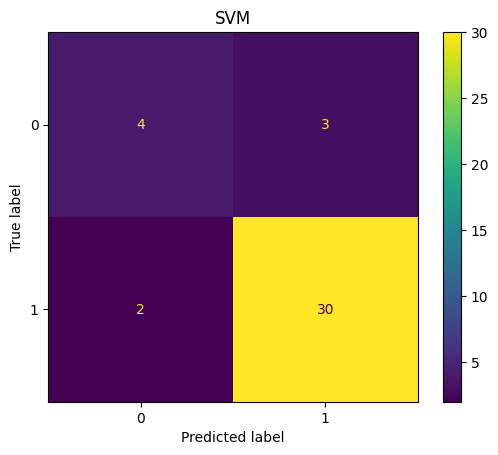

Accuracy score for SVM :  87.18
Recall:  0.94
Precision:  0.91


In [15]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear')

# training the SVM model with training data
svm_model.fit(X_train, Y_train)

svm_X_test_prediction = svm_model.predict(X_test)
svm_cm = confusion_matrix(Y_test, svm_X_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm)
disp.plot()
plt.title('SVM')
plt.show()

# accuracy score
svm_test_data_accuracy = round(accuracy_score(Y_test, svm_X_test_prediction)*100,2)
print('Accuracy score for SVM : ', svm_test_data_accuracy)


# calculate recall
recall = round(recall_score(Y_test, svm_X_test_prediction),2)
print('Recall: ', recall)

# calculate precision
precision = round(precision_score(Y_test,svm_X_test_prediction),2)
print('Precision: ', precision)

Evaluating and Calculating the accuracy score,Precision,recall for Decision Tree Classifier Model

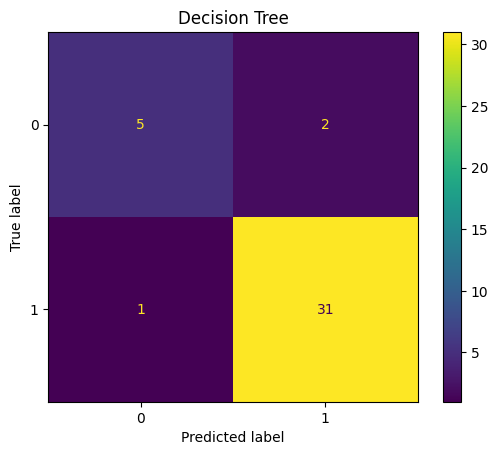

Accuracy score for Decision Tree Classifier:  92.31
Recall:  0.97
Precision:  0.94


In [16]:

from sklearn.tree import DecisionTreeClassifier
# Creating the Decision Tree Classifier Model
dt_model = DecisionTreeClassifier()

# training the Decision Tree Classifier model with training data
dt_model.fit(X_train, Y_train)


dt_X_test_prediction = dt_model.predict(X_test)
dt_cm = confusion_matrix(Y_test, dt_X_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm)
disp.plot()
plt.title('Decision Tree')
plt.show()

# accuracy score
dt_test_data_accuracy = round(accuracy_score(Y_test, dt_X_test_prediction)*100,2)
print('Accuracy score for Decision Tree Classifier: ', dt_test_data_accuracy)



# calculate recall
recall = round(recall_score(Y_test, dt_X_test_prediction),2)
print('Recall: ', recall)

# calculate precision
precision = round(precision_score(Y_test,dt_X_test_prediction),2)
print('Precision: ', precision)


Evaluating and Calculating the accuracy score,Precision,recall for KNN Classifier Model

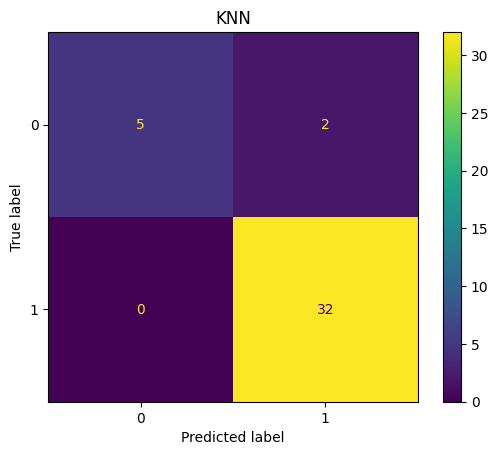

Accuracy score for KNN Classifier:  94.87
Recall:  1.0
Precision:  0.94


In [17]:
# Creating the KNN Classifier Model
knn_model = KNeighborsClassifier()

# training the KNN Classifier model with training data
knn_model.fit(X_train, Y_train)

knn_X_test_prediction = knn_model.predict(X_test)
knn_cm = confusion_matrix(Y_test, knn_X_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm)
disp.plot()
plt.title('KNN')
plt.show()

# accuracy score

knn_test_data_accuracy = round(accuracy_score(Y_test, knn_X_test_prediction)*100,2)
print('Accuracy score for KNN Classifier: ', knn_test_data_accuracy)


# calculate recall
recall =round(recall_score(Y_test, knn_X_test_prediction),2)
print('Recall: ', recall)

# calculate precision
precision =round(precision_score(Y_test,knn_X_test_prediction),2)
print('Precision: ', precision)

Evaluating and Calculating the accuracy score,Precision,recall for Logistic Regression Model

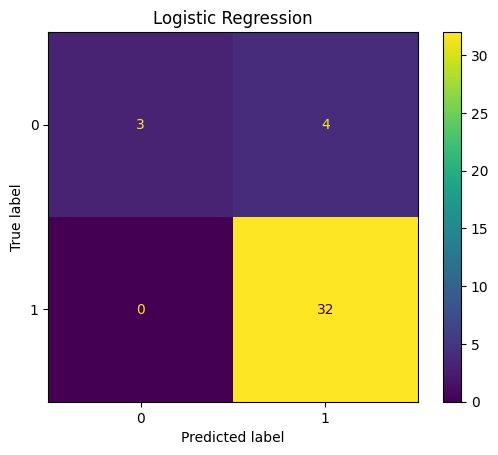

Accuracy score for Logistic Regression:  89.74
Recall:  1.0
Precision:  0.89


In [18]:
# Creating the Logistic Regression Model
lr_model = LogisticRegression()

# training the Logistic Regression model with training data
lr_model.fit(X_train, Y_train)


lr_X_test_prediction = lr_model.predict(X_test)
lr_cm = confusion_matrix(Y_test, lr_X_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm)
disp.plot()
plt.title('Logistic Regression')
plt.show()


# accuracy score
lr_test_data_accuracy = round(accuracy_score(Y_test, lr_X_test_prediction)*100,2)
print('Accuracy score for Logistic Regression: ', lr_test_data_accuracy)

# calculate recall
recall =round(recall_score(Y_test, lr_X_test_prediction),2)
print('Recall: ', recall)

# calculate precision
precision = round(precision_score(Y_test,lr_X_test_prediction),2)
print('Precision: ', precision)

Evaluating and Calculating the accuracy score,Precision,recall for Naive Bayes  Model

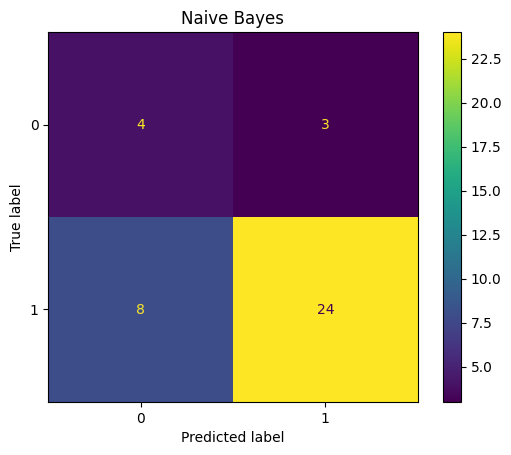

Accuracy score for Naive Bayes:  71.79
Recall:  0.75
Precision:  0.89


In [19]:
# Creating the Naive Bayes Model
nb_model = GaussianNB()

# training the Naive Bayes model with training data
nb_model.fit(X_train, Y_train)


nb_X_test_prediction = nb_model.predict(X_test)
nb_cm = confusion_matrix(Y_test, nb_X_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm)
disp.plot()
plt.title('Naive Bayes')
plt.show()


# accuracy score on test data
nb_test_data_accuracy = round(accuracy_score(Y_test, nb_X_test_prediction)*100,2)
print('Accuracy score for Naive Bayes: ', nb_test_data_accuracy)

# calculate recall
recall = round(recall_score(Y_test, nb_X_test_prediction),2)
print('Recall: ', recall)

# calculate precision
precision = round(precision_score(Y_test,nb_X_test_prediction),2)
print('Precision: ', precision)

Evaluating and Calculating the accuracy score,Precision,recall for Random Forest Classifier Model

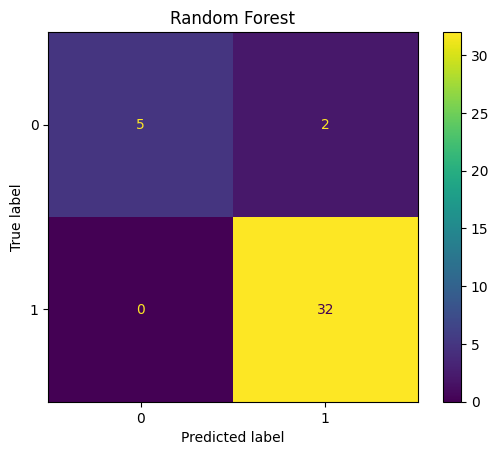

Accuracy score for Random Forest:  94.87
Recall:  1.0
Precision:  0.94


In [20]:
# Creating the Random Forest Model
rf_model = RandomForestClassifier()

# training the Random Forest model with training data
rf_model.fit(X_train, Y_train)

rf_X_test_prediction = rf_model.predict(X_test)
rf_cm = confusion_matrix(Y_test, rf_X_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
disp.plot()
plt.title('Random Forest')
plt.show()

# accuracy score on test data
rf_test_data_accuracy = round(accuracy_score(Y_test, rf_X_test_prediction)*100,2)
print('Accuracy score for Random Forest: ', rf_test_data_accuracy)


# calculate recall
recall = recall_score(Y_test, rf_X_test_prediction)
print('Recall: ', recall)

# calculate precision
precision =round(precision_score(Y_test,rf_X_test_prediction),2)
print('Precision: ', precision)

Building a Predictive System

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
#input_data=(116.01400,141.78100,110.65500,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.58400,0.03490,0.04825,0.04465,0.10470,0.01767,19.64900,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335)
input_data=(197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)




#changing input data into a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardize the data
std_data=scaler.transform(input_data_reshaped)

prediction=svm_model.predict(std_data)
print(prediction)

if(prediction[0]==0):
  print("The person does not have parkinsons Disease")

else:
   print("The person has parkinsons Disease")



[0]
The person does not have parkinsons Disease
